In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# %%
df = pd.read_csv(r"TEST_DATA\Contact_study\Conductive_rubber\D325140\position_5p5mm.csv")
# %%


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sensor_ID                 20 non-null     object 
 1   Micrometer_Position (mm)  20 non-null     float64
 2   Voltage (V)               20 non-null     int64  
 3   Current (A)               20 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 772.0+ bytes


In [3]:
import os

# Initialize an empty list to store dataframes
dfs = []

# Walk through the TEST_DATA directory
for root, dirs, files in os.walk(r"TEST_DATA\Contact_study"):
    for file in files:
        if file.endswith('.csv'):
            # Get the subfolder name
            contact_type = os.path.basename(os.path.dirname(root))
            sensor_id = os.path.basename(root)
            
            # Read the CSV file
            print(f"root: {root}")
            print(f"subfolder: {contact_type}")
            print(f"sensor_id: {sensor_id}")
            print(f"file: {file}")
            file_path = os.path.join(root, file)
            print(file_path)
            temp_df = pd.read_csv(file_path)
            
            # Add subfolder as a new column
            temp_df['contact_type'] = contact_type
            temp_df['sensor_id'] = sensor_id
            
            # Append to list
            dfs.append(temp_df)

# Combine all dataframes
combined_df = pd.concat(dfs, ignore_index=True)

# Display first few rows
print("Combined DataFrame shape:", combined_df.shape)
combined_df.head()


root: TEST_DATA\Contact_study\Conductive_rubber\D323902
subfolder: Conductive_rubber
sensor_id: D323902
file: position_5p5mm.csv
TEST_DATA\Contact_study\Conductive_rubber\D323902\position_5p5mm.csv
root: TEST_DATA\Contact_study\Conductive_rubber\D323902
subfolder: Conductive_rubber
sensor_id: D323902
file: position_6p0mm.csv
TEST_DATA\Contact_study\Conductive_rubber\D323902\position_6p0mm.csv
root: TEST_DATA\Contact_study\Conductive_rubber\D323902
subfolder: Conductive_rubber
sensor_id: D323902
file: position_6p5mm.csv
TEST_DATA\Contact_study\Conductive_rubber\D323902\position_6p5mm.csv
root: TEST_DATA\Contact_study\Conductive_rubber\D325140
subfolder: Conductive_rubber
sensor_id: D325140
file: position_5p5mm.csv
TEST_DATA\Contact_study\Conductive_rubber\D325140\position_5p5mm.csv
root: TEST_DATA\Contact_study\Conductive_rubber\D325140
subfolder: Conductive_rubber
sensor_id: D325140
file: position_6p0mm.csv
TEST_DATA\Contact_study\Conductive_rubber\D325140\position_6p0mm.csv
root: TEST

,Sensor_ID,Micrometer_Position (mm),Voltage (V),Current (A),contact_type,sensor_id
0,D323902,5.5,0,2.018044e-10,Conductive_rubber,D323902
1,D323902,5.5,-100,7.652551e-09,Conductive_rubber,D323902
2,D323902,5.5,-200,1.581944e-08,Conductive_rubber,D323902
3,D323902,5.5,-300,2.560581e-08,Conductive_rubber,D323902
4,D323902,5.5,-400,3.659169e-08,Conductive_rubber,D323902


In [4]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sensor_ID                 240 non-null    object 
 1   Micrometer_Position (mm)  300 non-null    float64
 2   Voltage (V)               300 non-null    int64  
 3   Current (A)               300 non-null    float64
 4   contact_type              300 non-null    object 
 5   sensor_id                 300 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 14.2+ KB


In [5]:
def convert_absolute(x):
    return np.abs(x)

combined_df['Voltage (V)'] = combined_df['Voltage (V)'].apply(convert_absolute)

In [6]:
def micrometer_position_to_compression(x):
    if x == 5.5:
        return 1.0
    elif x == 6.0:
        return 0.5
    elif x == 6.5:
        return 0
    else:
        return None

combined_df['Compression (mm)'] = combined_df['Micrometer_Position (mm)'].apply(micrometer_position_to_compression)


C:\Users\10552\AppData\Local\Temp\ipykernel_16320\2507434831.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('Set1')


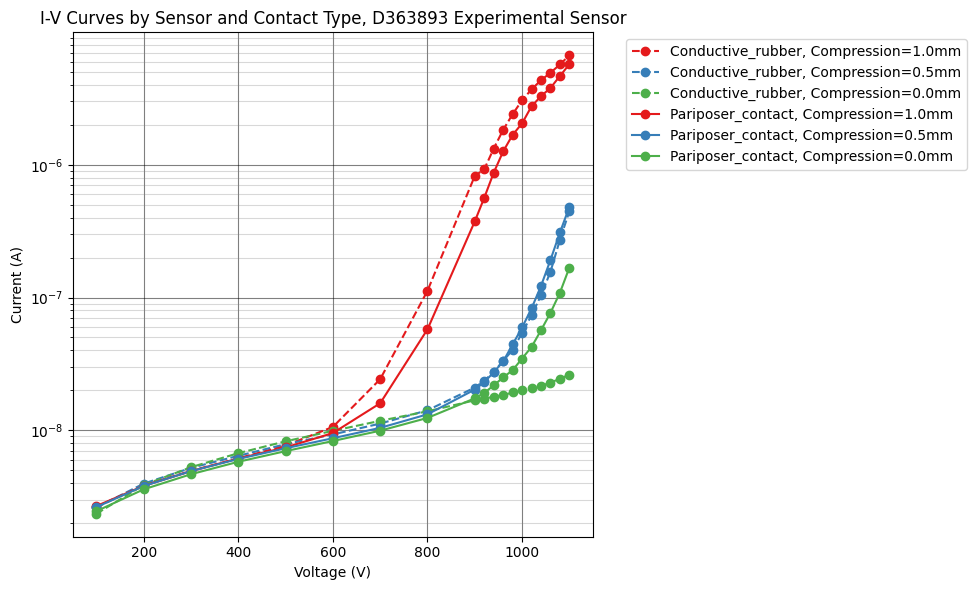

In [7]:
# SENSOR_ID = "D325140" # Pockels Reference
# SENSOR_ID = "D323902" # Pockels Reference
SENSOR_ID = "D363893" # Experimental Sensor

sensor_df = combined_df[combined_df['sensor_id'] == SENSOR_ID]

plt.figure(figsize=(10, 6))

# Plot for each unique combination of sensor_id and contact_type
for (contact, compression) in sensor_df[['contact_type', 'Compression (mm)']].drop_duplicates().values:
    mask = (sensor_df['contact_type'] == contact) & (sensor_df['Compression (mm)'] == compression)
    data = sensor_df[mask]
    colormap = plt.cm.get_cmap('Set1')
    if compression == 1.0:
        color = colormap(0) 
    elif compression == 0.5:
        color = colormap(1)
    else:
        color = colormap(2)
    if contact == "Conductive_rubber":
        plt.plot(
            data["Voltage (V)"][1:],
            data["Current (A)"][1:],
            "--o",
            label=f"{contact}, Compression={compression}mm",
            color=color,
        )
    else:
        plt.plot(
            data["Voltage (V)"][1:],
            data["Current (A)"][1:],
            "-o",
            label=f"{contact}, Compression={compression}mm",
            color=color,
        )

plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.yscale('log')  # Using log scale based on context from main.py
plt.title(f'I-V Curves by Sensor and Contact Type, {SENSOR_ID} Experimental Sensor')
plt.grid(True, which='minor', alpha=0.3, color='gray')
plt.grid(True, which='major', alpha=0.5, color='black')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [8]:
import os
import pandas as pd

# Get list of all CSV files in the folder
folder_path = "TEST_DATA\\BNL_sensors"
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Read and combine all CSV files
dataframes = []
for file in csv_files:
    df = pd.read_csv(os.path.join(folder_path, file))
    # Clean up contact type names by replacing spaces with underscores
    # df['contact_type'] = df['Contact_Type'].str.replace(' ', '_')
    dataframes.append(df)

# Concatenate all dataframes
bnl_df = pd.concat(dataframes, ignore_index=True)
bnl_df['Sensor_ID'] = "D444548"

print("Combined dataframe shape:", bnl_df.shape)
print("\nFirst few rows:")
print(bnl_df.head())
print(bnl_df.tail())


Combined dataframe shape: (400, 6)

First few rows:
  Sensor_ID       Contact_Type  Micrometer_Position (mm)  Compression (mm)  \
0   D444548  Conductive Rubber                       6.5               0.0   
1   D444548  Conductive Rubber                       6.5               0.0   
2   D444548  Conductive Rubber                       6.5               0.0   
3   D444548  Conductive Rubber                       6.5               0.0   
4   D444548  Conductive Rubber                       6.5               0.0   

   Voltage (V)   Current (A)  
0            0  4.585174e-09  
1         -100  1.139915e-07  
2         -200  9.463284e-07  
3         -300  3.379793e-06  
4         -400  9.828166e-06  
    Sensor_ID    Contact_Type  Micrometer_Position (mm)  Compression (mm)  \
395   D444548  PariposerSheet                       5.5               1.0   
396   D444548  PariposerSheet                       5.5               1.0   
397   D444548  PariposerSheet                       5.5       

C:\Users\10552\AppData\Local\Temp\ipykernel_16320\4008727942.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('Set1')


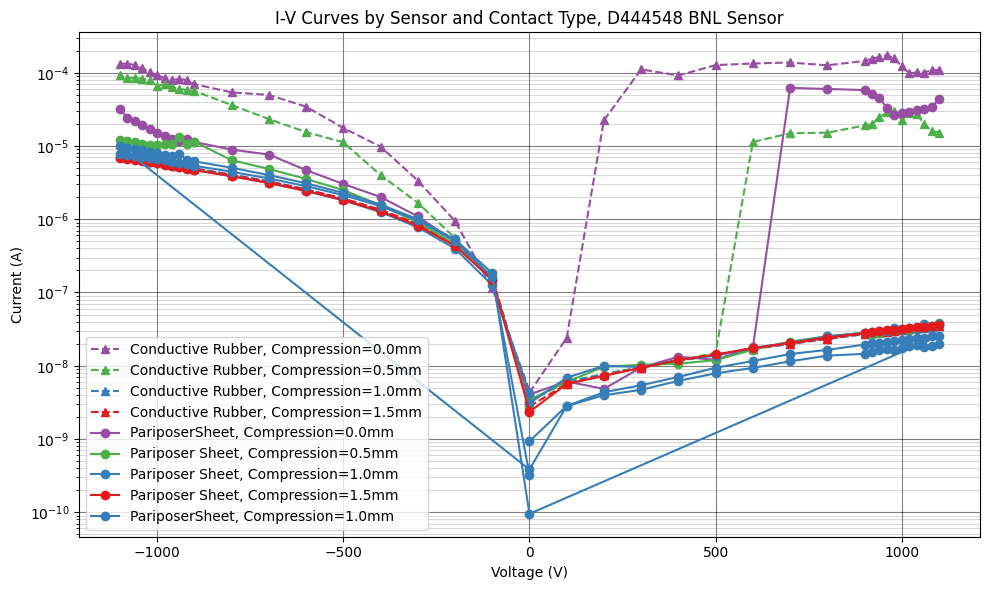

In [9]:
SENSOR_ID = "D444548" # BNL sensor

sensor_df = bnl_df[bnl_df['Sensor_ID'] == SENSOR_ID]

plt.figure(figsize=(10, 6))

# Plot for each unique combination of sensor_id and contact_type
for (contact, compression) in sensor_df[['Contact_Type', 'Compression (mm)']].drop_duplicates().values:
    mask = (sensor_df['Contact_Type'] == contact) & (sensor_df['Compression (mm)'] == compression)
    data = sensor_df[mask]
    colormap = plt.cm.get_cmap('Set1')
    if compression == 1.5:
        color = colormap(0) 
    elif compression == 1.0:
        color = colormap(1)
    elif compression == 0.5:
        color = colormap(2)
    else:
        color = colormap(3)
    if contact == "Conductive Rubber":
        plt.plot(
            data["Voltage (V)"][:20],
            data["Current (A)"][:20],
            "--^",
            label=f"{contact}, Compression={compression}mm",
            color=color,
        )
        plt.plot(
            data["Voltage (V)"][20:],
            data["Current (A)"][20:],
            "--^",
            color=color,
        )
    else:
        plt.plot(
            data["Voltage (V)"][:20],
            data["Current (A)"][:20],
            "-o",
            label=f"{contact}, Compression={compression}mm",
            color=color,
        )
        plt.plot(
            data["Voltage (V)"][20:],
            data["Current (A)"][20:],
            "-o",
            color=color,
        )

plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.yscale('log')  # Using log scale based on context from main.py
plt.title(f'I-V Curves by Sensor and Contact Type, {SENSOR_ID} BNL Sensor')
plt.grid(True, which='minor', alpha=0.3, color='gray')
plt.grid(True, which='major', alpha=0.5, color='black')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [10]:
folder_path = "TEST_DATA\\BNL_sensors\\Sensor_comparison"
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Read and combine all CSV files
dataframes = []
for file in csv_files:
    df = pd.read_csv(os.path.join(folder_path, file))
    dataframes.append(df)

# Concatenate all dataframes
comparison_df = pd.concat(dataframes, ignore_index=True)

print("Combined dataframe shape:", comparison_df.shape)
print("\nFirst few rows:")
print(comparison_df.head())
print(comparison_df.tail())


Combined dataframe shape: (120, 6)

First few rows:
  Sensor_ID     Contact_Type  Micrometer_Position (mm)  Compression (mm)  \
0   D363893  Pariposer Sheet                       5.5               1.0   
1   D363893  Pariposer Sheet                       5.5               1.0   
2   D363893  Pariposer Sheet                       5.5               1.0   
3   D363893  Pariposer Sheet                       5.5               1.0   
4   D363893  Pariposer Sheet                       5.5               1.0   

   Voltage (V)   Current (A)  
0            0  4.191087e-09  
1         -100  1.256356e-07  
2         -200  3.978653e-07  
3         -300  7.784955e-07  
4         -400  1.254388e-06  
    Sensor_ID    Contact_Type  Micrometer_Position (mm)  Compression (mm)  \
115   D444588  PariposerSheet                       5.5               1.0   
116   D444588  PariposerSheet                       5.5               1.0   
117   D444588  PariposerSheet                       5.5               1.0 

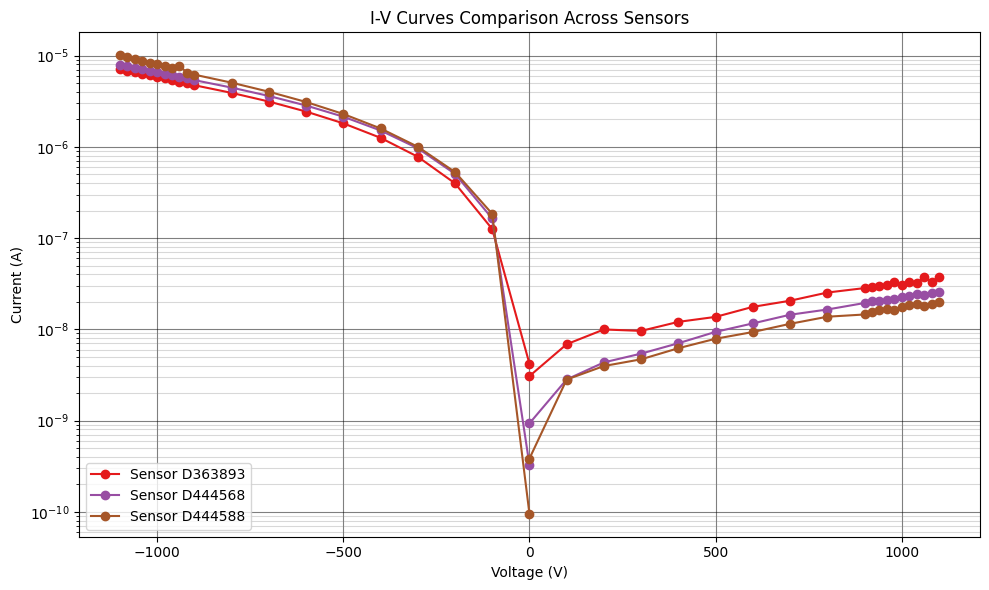

In [11]:
# Get unique sensor IDs
sensor_ids = comparison_df['Sensor_ID'].unique()

# Create plot
plt.figure(figsize=(10, 6))
colormap = plt.colormaps['Set1']  # Using updated colormap syntax

for idx, sensor_id in enumerate(sensor_ids):
    sensor_data = comparison_df[comparison_df['Sensor_ID'] == sensor_id]
    
    # Plot negative and positive voltage sweeps with same color but different markers
    plt.plot(
        sensor_data["Voltage (V)"][:20],
        sensor_data["Current (A)"][:20],
        "-o",
        label=f"Sensor {sensor_id}",
        color=colormap(idx/len(sensor_ids))
    )
    plt.plot(
        sensor_data["Voltage (V)"][20:],
        sensor_data["Current (A)"][20:],
        "-o", 
        color=colormap(idx/len(sensor_ids))
    )

plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)') 
plt.yscale('log')
plt.title('I-V Curves Comparison Across Sensors')
plt.grid(True, which='minor', alpha=0.3, color='gray')
plt.grid(True, which='major', alpha=0.5, color='black')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()


In [12]:
folder_path = "TEST_DATA\\Pockels_reference"
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
dataframes = []

for file in csv_files:
    df = pd.read_csv(os.path.join(folder_path, file))
    dataframes.append(df)

pockels_df = pd.concat(dataframes, ignore_index=True)

print("Combined dataframe shape:", pockels_df.shape)
print("\nFirst few rows:")
print(pockels_df.head())
print(pockels_df.tail())


Combined dataframe shape: (160, 6)

First few rows:
  Sensor_ID    Contact_Type  Micrometer_Position (mm)  Compression (mm)  \
0   D323902  PariposerSheet                       5.5               1.0   
1   D323902  PariposerSheet                       5.5               1.0   
2   D323902  PariposerSheet                       5.5               1.0   
3   D323902  PariposerSheet                       5.5               1.0   
4   D323902  PariposerSheet                       5.5               1.0   

   Voltage (V)   Current (A)  
0            0  3.158314e-09  
1         -100  5.686230e-09  
2         -200  1.519118e-08  
3         -300  2.572905e-08  
4         -400  3.730667e-08  
    Sensor_ID    Contact_Type  Micrometer_Position (mm)  Compression (mm)  \
155   D325148  PariposerSheet                       5.5               1.0   
156   D325148  PariposerSheet                       5.5               1.0   
157   D325148  PariposerSheet                       5.5               1.0   
158

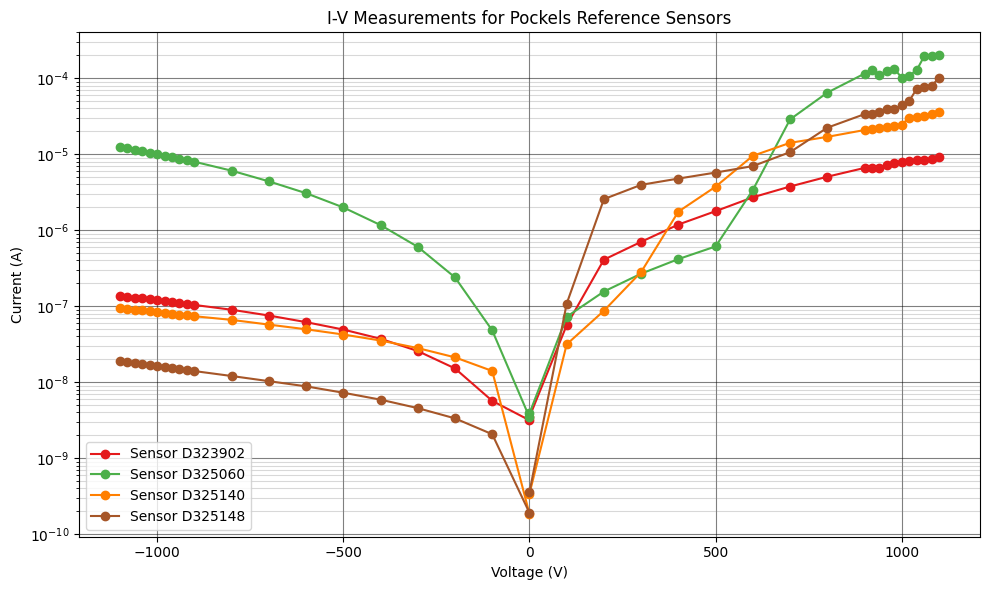

In [13]:
# Get unique sensor IDs
sensor_ids = pockels_df['Sensor_ID'].unique()

# Create plot
plt.figure(figsize=(10, 6))
colormap = plt.colormaps['Set1']  # Using updated colormap syntax

for idx, sensor_id in enumerate(sensor_ids):
    sensor_data = pockels_df[pockels_df['Sensor_ID'] == sensor_id]
    
    # Plot negative and positive voltage sweeps with same color but different markers
    plt.plot(
        sensor_data["Voltage (V)"][:20],
        sensor_data["Current (A)"][:20],
        "-o",
        label=f"Sensor {sensor_id}",
        color=colormap(idx/len(sensor_ids))
    )
    plt.plot(
        sensor_data["Voltage (V)"][20:],
        sensor_data["Current (A)"][20:],
        "-o", 
        color=colormap(idx/len(sensor_ids))
    )

plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)') 
plt.yscale('log')
plt.title('I-V Measurements for Pockels Reference Sensors')
plt.grid(True, which='minor', alpha=0.3, color='gray')
plt.grid(True, which='major', alpha=0.5, color='black')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()